In [55]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from imageio import imread 

In [83]:
train_labels = pd.read_csv("C:/Users/Lee Jong Ann/Desktop/train.csv/train.csv")
train_labels.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [84]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_target(row): 
    row.Target = np.array(row.Target.split(' ')).astype(int)
    for num in row.Target: 
        name = label_names[int(num)]
        row.loc[name]= 1
    return row 


In [85]:
for key in label_names.keys():
    train_labels[label_names[key]] = 0 

In [86]:
train_labels.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
train_labels = train_labels.apply(fill_target,axis=1)
train_labels.head(15)

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18],0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,[0],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,"[25, 2]",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,002679c2-bbb6-11e8-b2ba-ac1f6b6435d0,[0],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,00285ce4-bba0-11e8-b2b9-ac1f6b6435d0,"[2, 0]",1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,002daad6-bbc9-11e8-b2bc-ac1f6b6435d0,[7],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


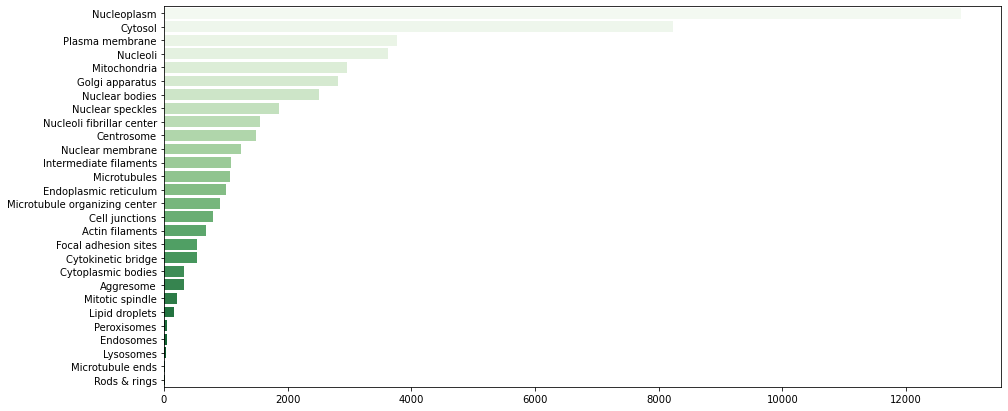

In [88]:
target_counts = train_labels.drop(['Id','Target'],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,7))
sns.barplot(y=target_counts.index.values,x=target_counts.values,order=target_counts.index,palette="Greens")

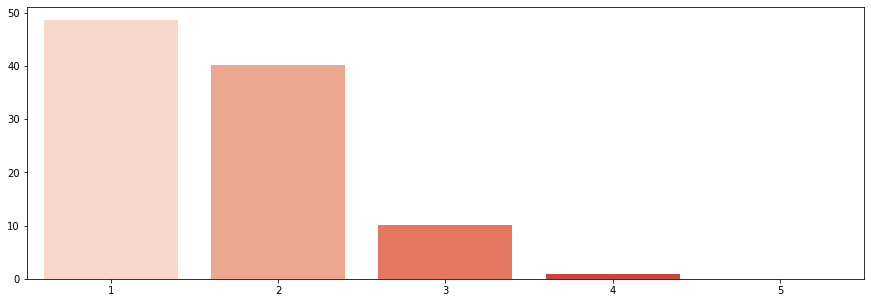

In [89]:
train_labels['number_of_targets'] = train_labels.drop(['Id','Target'],axis=1).sum(axis=1)
count_perc = np.round(100 * train_labels['number_of_targets'].value_counts()/train_labels.shape[0],2)
plt.figure(figsize=(15,5))
sns.barplot(x=count_perc.index.values,y=count_perc.values,palette='Reds')

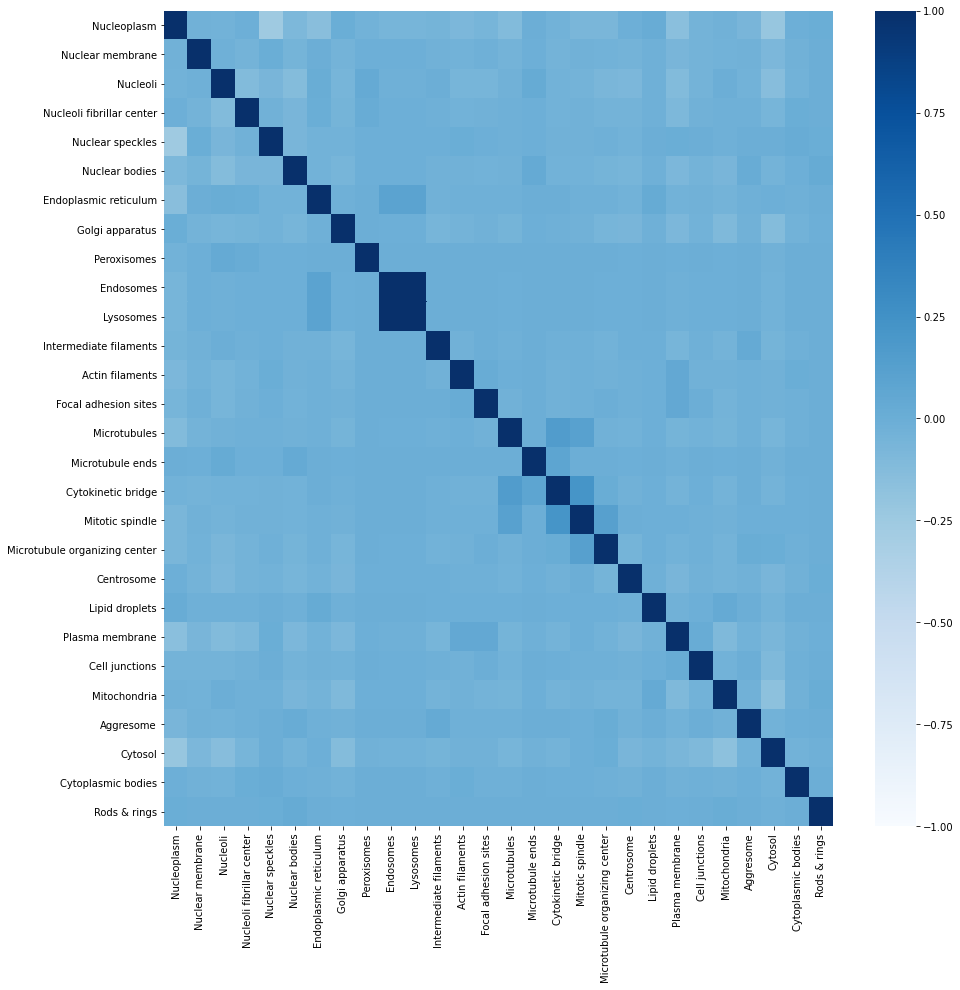

In [90]:
plt.figure(figsize=(15,15))
sns.heatmap(train_labels[train_labels.number_of_targets>1].drop(['Id','Target','number_of_targets'],axis=1).corr(),cmap='Blues',vmin=-1,vmax=1)

In [91]:
def find_counts(special_counts,labels): 
    counts = labels[labels[special_counts] == 1].drop(['Id','Target','number_of_targets'],axis=1).sum(axis=0)
    counts = counts[counts>1]
    counts = counts.sort_values()
    return counts

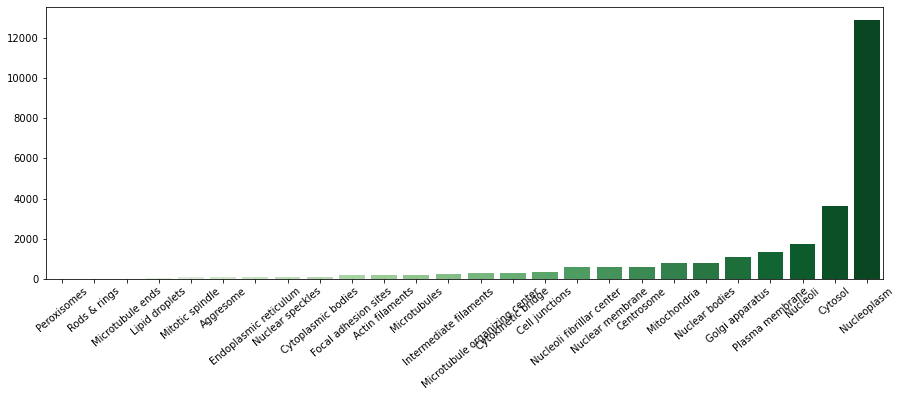

In [92]:
Nucleoplasm = find_counts('Nucleoplasm',train_labels)
plt.figure(figsize=(15,5))
plt.xticks(rotation=40)
sns.barplot(x=Nucleoplasm.index.values,y=Nucleoplasm.values,palette='Greens')

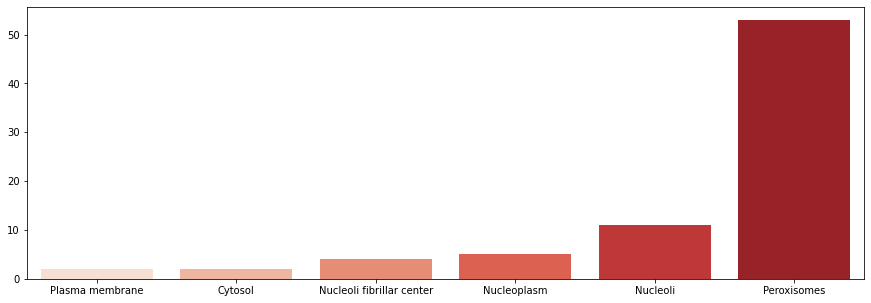

In [93]:
Peroxisomes = find_counts('Peroxisomes',train_labels)
plt.figure(figsize=(15,5))
sns.barplot(x=Peroxisomes.index.values,y=Peroxisomes.values,palette='Reds')